In [ ]:
!pip install fosforml

In [1]:
from fosforml.model_manager.snowflakesession import get_session

my_session = get_session()

In [2]:
file_name = 'ATTRITION_PREDICTIVE_DATA1'

In [3]:
sf_df = my_session.sql("select * from {}".format(file_name ))


In [4]:
import pandas as pd
pandas_df = sf_df.to_pandas()
#pandas_df = pd.read_csv(file_name)

In [5]:
print(pandas_df.isnull().sum())

EMPLOYEE_ID                      0
TENURE_MONTHS                    0
BIRTH_YEAR                       0
AGE                              0
SENIORITY                        0
SCHOOL_ENDDATE                   0
JOB_STARTDATE                    0
JOB_ENDDATE                  90076
CITY                             0
DISTANCE                         0
DEGREE_CLEAN                     0
ETHNICITY                        0
MARITAL_STATUS                   0
ROLE                             0
COMPANY_NAME                     0
ORGANIZATION_TYPE                0
ORGANIZATION_OWNERSHIP           0
STATE                            0
COUNTRY                          0
GENDER                           0
WORK_LIFE_BALANCE                0
BUSINESS_TRAVEL                  0
ENVIRONMENT_SATISFACTION         0
SALARY                           0
JOB_SATISFACTION                 0
PERCENTAGE_SALARY_HIKE           0
PERFORMANCE_RATING               0
OVER_TIME                        0
RELATIONSHIP_SATISFA

In [6]:
pandas_df = pandas_df.dropna()

In [7]:
print(pandas_df.isnull().sum())

EMPLOYEE_ID                  0
TENURE_MONTHS                0
BIRTH_YEAR                   0
AGE                          0
SENIORITY                    0
SCHOOL_ENDDATE               0
JOB_STARTDATE                0
JOB_ENDDATE                  0
CITY                         0
DISTANCE                     0
DEGREE_CLEAN                 0
ETHNICITY                    0
MARITAL_STATUS               0
ROLE                         0
COMPANY_NAME                 0
ORGANIZATION_TYPE            0
ORGANIZATION_OWNERSHIP       0
STATE                        0
COUNTRY                      0
GENDER                       0
WORK_LIFE_BALANCE            0
BUSINESS_TRAVEL              0
ENVIRONMENT_SATISFACTION     0
SALARY                       0
JOB_SATISFACTION             0
PERCENTAGE_SALARY_HIKE       0
PERFORMANCE_RATING           0
OVER_TIME                    0
RELATIONSHIP_SATISFACTION    0
CHURN                        0
dtype: int64


In [8]:
#dataset = pandas_df[["DISTANCE","DEGREE_CLEAN","ROLE","COMPANY_NAME","ORGANIZATION_TYPE","ORGANIZATION_OWNERSHIP","JOB_ENDDATE","CHURN"]]
dataset = pandas_df[["ORGANIZATION_TYPE","JOB_ENDDATE","CHURN"]]

In [9]:
print(dataset)

         ORGANIZATION_TYPE JOB_ENDDATE  CHURN
0       Financial Services  2019-08-01      0
1                Aerospace  2021-06-01      1
3       Financial Services  2017-07-01      1
4               E-commerce  2019-08-01      0
6               E-commerce  2018-07-01      1
...                    ...         ...    ...
299995          Investment  2023-05-01      0
299996          Technology  2023-05-01      0
299997       Environmental  2023-05-01      0
299998          Technology  2023-05-01      0
299999       Environmental  2023-06-01      0

[209924 rows x 3 columns]


In [10]:
dataset['JOB_ENDDATE'] = pd.to_datetime(dataset['JOB_ENDDATE'],format= '%d-%m-%Y').dt.strftime('%d-%m-%Y')

In [11]:
dataset.set_index('JOB_ENDDATE', inplace = True)

In [12]:
dataset.nunique()

ORGANIZATION_TYPE    16
CHURN                 2
dtype: int64

In [13]:
groupedDataset = dataset.groupby(["ORGANIZATION_TYPE","JOB_ENDDATE"]).agg({'CHURN': 'sum'}).reset_index()

In [14]:
groupedDataset['JOB_ENDDATE'] = pd.to_datetime(groupedDataset['JOB_ENDDATE'],format= '%d-%m-%Y')

In [15]:
date_start = pd.to_datetime('01-08-2022',format= '%d-%m-%Y')
end_date = pd.to_datetime('01-09-2024',format= '%d-%m-%Y')
filteredDataset = groupedDataset[(groupedDataset['JOB_ENDDATE'] > date_start) & (groupedDataset['JOB_ENDDATE'] < end_date)]

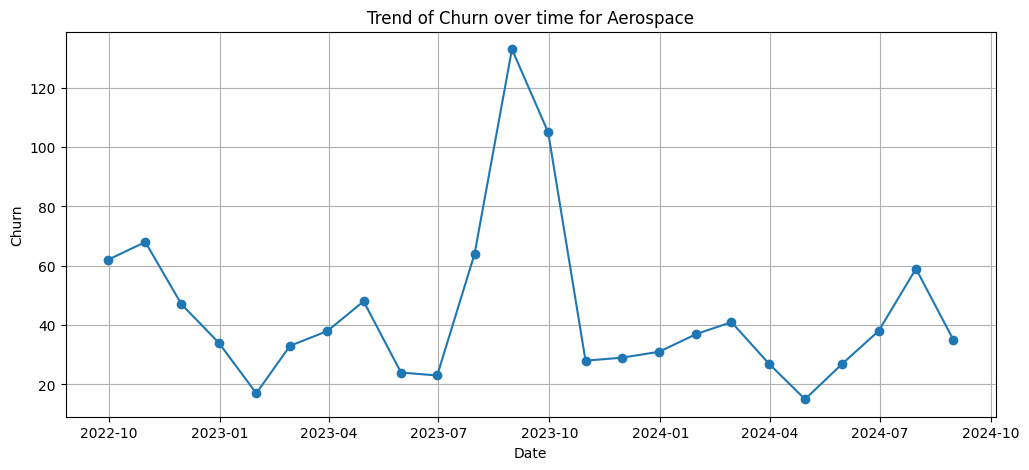

In [16]:
import matplotlib.pyplot as plt
aerospaceData = filteredDataset[filteredDataset['ORGANIZATION_TYPE']=='Aerospace']
aerospaceData['JOB_ENDDATE'] = pd.to_datetime(aerospaceData['JOB_ENDDATE'])
monthly_data = aerospaceData.resample('M', on='JOB_ENDDATE').sum()
plt.figure(figsize = (12,5))
plt.plot(monthly_data.index , monthly_data['CHURN'],  marker='o',  linestyle = '-')
plt.title('Trend of Churn over time for Aerospace')
plt.xlabel('Date')
plt.ylabel('Churn')
plt.grid(True)
plt.show()

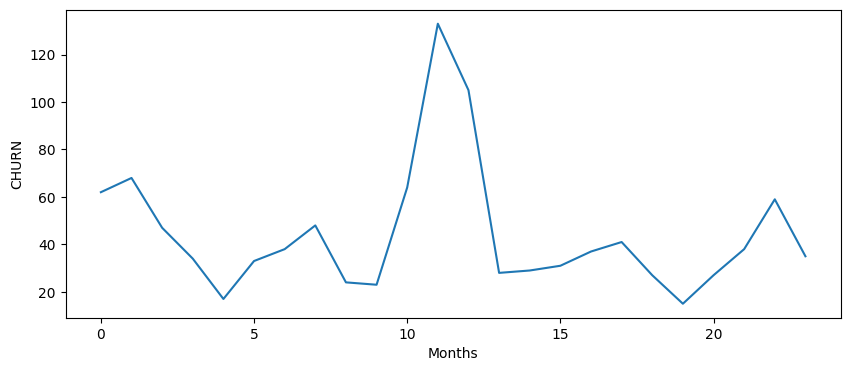

In [17]:
grouped_data = filteredDataset.groupby(['ORGANIZATION_TYPE' , pd.Grouper(key = 'JOB_ENDDATE', freq= 'M')]).sum().reset_index()
data = grouped_data[grouped_data['ORGANIZATION_TYPE']  == 'Aerospace']
final_dataset = data[['JOB_ENDDATE','CHURN']]
final_dataset['Month'] = final_dataset.index+1
plt.figure(figsize=(10,4))
plt.xlabel("Months")
plt.ylabel("CHURN")
plt.plot(final_dataset['CHURN'])

In [18]:
final_dataset['mavg_12']= final_dataset['CHURN'].rolling(window = 1).mean().shift(1)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
final_dataset[['CHURN', 'mavg_12']][1:]

,CHURN,mavg_12
1,68,62.00
2,47,68.00
3,34,47.00
4,17,34.00
5,33,17.00
6,38,33.00
7,48,38.00
8,24,48.00
9,23,24.00
10,64,23.00


In [19]:
#Decomposing Time series

from statsmodels.tsa.seasonal import seasonal_decompose
ts_decompose_multiplicative = seasonal_decompose(final_dataset['CHURN'], model = 'multiplicative', period=12, extrapolate_trend = 'freq')
ts_decompose_additive = seasonal_decompose(final_dataset['CHURN'], model = 'additive', period=12, extrapolate_trend = 'freq')
#Plotting 
#ts_decompose.show()
ts_plot = ts_decompose_multiplicative.plot()
ts_plot = ts_decompose_additive.plot()

ModuleNotFoundError: No module named 'statsmodels'